<a href="https://colab.research.google.com/github/thatssweety/Handwriting-Recognition-and-Classification-Of-Hindi-Vowels/blob/main/Handwriting_Recognition_and_Classification_Of_Hindi_Vowels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/mnist/NEW DATASET.zip'

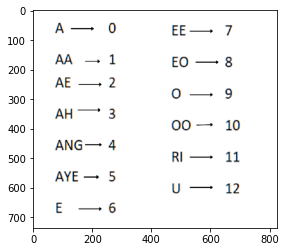

In [22]:
img_array = cv2.imread('/content/gdrive/MyDrive/mnist/Image Data fot training and validation (1).png')            
plt.imshow(img_array)
plt.show()

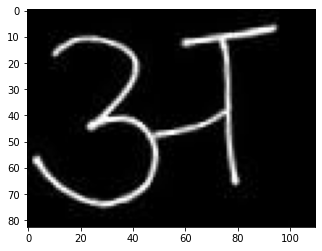

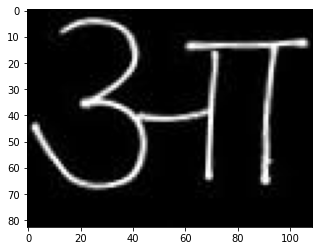

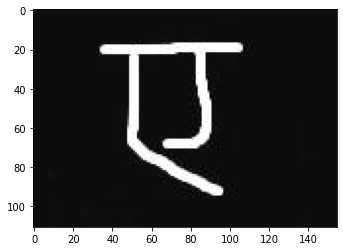

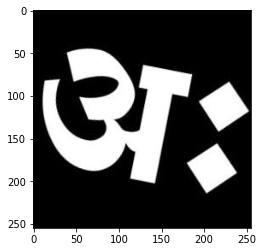

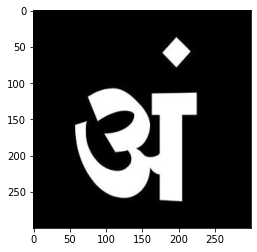

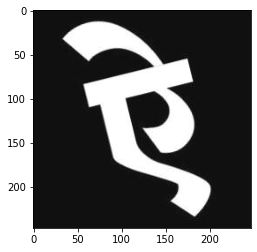

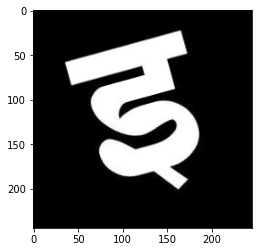

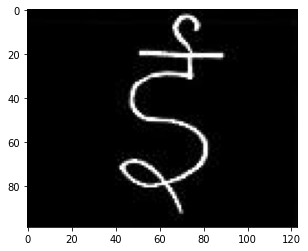

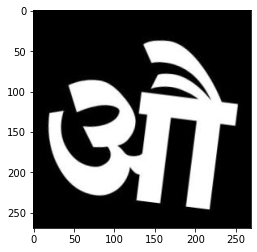

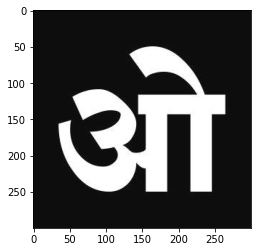

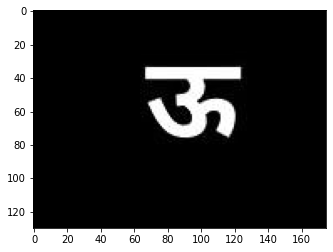

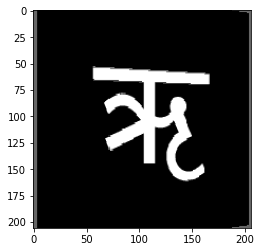

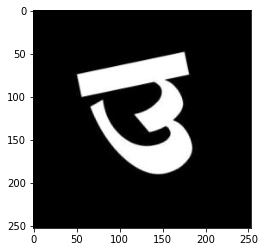

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/NEW DATASET"

CATEGORIES = ["A","AA","AE","AH","ANG","AYE","E","EE","EO","O","OO","RI","U"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        img_array=cv2.bitwise_not(img_array) # convert to array
        plt.imshow(img_array, cmap='gray')  # graph 
        plt.show()  # display

        break  # we just want one for now so break
       

In [4]:
print(img_array.shape)

(253, 253)


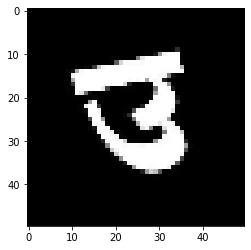

In [5]:
IMG_SIZE=50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#new_array=cv2.bitwise_not(new_array) 
plt.show()


In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array=cv2.bitwise_not(new_array) 
              
                #change black to white
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))

100%|██████████| 1000/1000 [00:00<00:00, 4872.07it/s]

13000


In [14]:
import random
random.shuffle(training_data)

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



X = X/255.0
y=np.array(y)

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(32))

model.add(Dense(13))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.4)

Epoch 1/3
244/244 [==============================] - 13s 6ms/step - loss: 0.3405 - sparse_categorical_accuracy: 0.9135 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9896
Epoch 2/3
244/244 [==============================] - 1s 6ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0163 - val_sparse_categorical_accuracy: 0.9956
Epoch 3/3
244/244 [==============================] - 1s 5ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0127 - val_sparse_categorical_accuracy: 0.9969


In [11]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [12]:
filepath = './saved_model'
save_model(model, filepath)

In [13]:
model = load_model(filepath, compile = True)

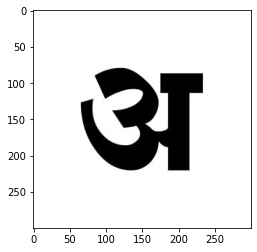

In [15]:
img_array = cv2.imread('/content/gdrive/MyDrive/mnist/A.jpg',cv2.IMREAD_GRAYSCALE)            
plt.imshow(img_array,cmap='gray')
plt.show()

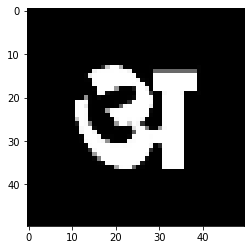

In [17]:
IMG_SIZE=50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array=cv2.bitwise_not(new_array)
#new_array=cv2.bitwise_not(new_array)
plt.imshow(new_array,cmap='gray')
plt.show()
new_array=np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
samples_to_predict = []
samples_to_predict.append(new_array)

In [19]:
predictions = model.predict(new_array)
print(predictions)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[0]


0: Belonging to class 0 : 'A'